In [77]:
from duckduckgo_search import ddg_images

from pathlib import Path
import requests
from PIL import Image, ImageOps
from io import BytesIO
import os

In [78]:
rune_names = ['Ansuz', 'Berkanan', 'Kaunan', 'Dagaz', 'Ehwaz', 'Fehu', 'Gebo',
'Hagalaz', 'Isa', 'Jera', 'Kaunaz', 'Laguz', 'Mannaz', 'Nauthiz', 'Othila', 'Peorth', 'Raido', 'Sowulo',
'Teiwaz', 'Uruz', 'Wunjo', 'Algiz', 'Eiwaz', 'Thurisaz', 'Inguz']

Checking scraping generated data

In [79]:
keyword = f'{rune_names[0].lower()} rune'
runes = ddg_images(keywords=rune_names[0].lower(), max_results=10)

In [80]:
runes[1]

{'title': 'Ansuz - The Birch Grove',
 'image': 'https://i0.wp.com/thebirchgrove.com/wp-content/uploads/2016/01/ansuz.jpg',
 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.dZcEdHNbKlPIWhIBU0V99AHaI8&pid=Api',
 'url': 'http://thebirchgrove.com/2016/01/25/ansuz/',
 'height': 302,
 'width': 250,
 'source': 'Bing'}

Setting-up data collection paths

In [81]:
data_root = Path('../data').resolve()

Download check

In [82]:
img = requests.get(runes[0]['image'])
img.status_code

200

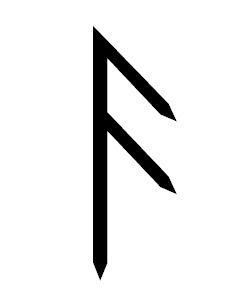

In [83]:
img = Image.open(BytesIO(img.content))
img

Image scraping script

In [85]:
for rune_name in rune_names[:1]:
    save_path = data_root/f'runes/{rune_name.lower()}/'
    os.makedirs(save_path, exist_ok=True)
    keyword = f'{rune_name.lower()} rune'
    runes = ddg_images(keywords=rune_name.lower(), max_results=6)

    for i, rune in enumerate(runes):
        img = requests.get(rune['image'])
        if img.status_code == 200:
            img = Image.open(BytesIO(img.content))
            img = ImageOps.contain(img, (256, 256))
            img.save(save_path/f'{rune_name.lower()}_{i}.png')